# Lesson 2 Demo 1: Creating Normalized Tables

<img src="images/postgresSQLlogo.png" width="250" height="250">

## Walk through the basics of modeling data in normalized form. <br>
<ol><li>Create tables in PostgreSQL
<li>Insert rows of data
<li>Do a simple JOIN SQL query to show how these tables can work together.

### Import the library 
Note: An error might popup after this command has executed. If it does, read it carefully before ignoring. 

In [10]:
import psycopg2

In [11]:
#!echo "alter user student createdb;" | sudo -u postgres psql

### Create a connection to the database, get a cursor, and set autocommit to true

In [12]:
# Create a connection
try: 
    conn = psycopg2.connect("host=127.0.0.1 dbname=udacity user=postgres password=Kokoaiye2020")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
    
# get a cursor    
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get curser to the Database")
    print(e)
    
# set the autocommit to true    
conn.set_session(autocommit=True)

#### Let's imagine we have a table called Music Library. 

`Table Name: music_library
column 0: Album Id
column 1: Album Name
column 2: Artist Name
column 3: Year 
column 4: List of songs`

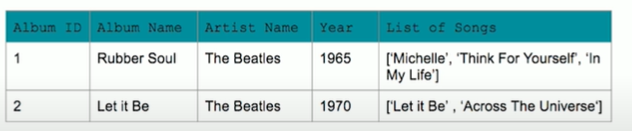

#### Now to translate this information into a Create Table Statement and insert the data

In [13]:
# Create a Table statement
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS music_library (album_id int, \
                                                           album_name varchar, artist_name varchar, \
                                                           year int, songs text[]);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
# Include the Insert statement    
try: 
    cur.execute("INSERT INTO music_library (album_id, album_name, artist_name, year, songs) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (1, "Rubber Soul", "The Beatles", 1965, ["Michelle", "Think For Yourself", "In My Life"]))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO music_library (album_id, album_name, artist_name, year, songs) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (2, "Let It Be", "The Beatles", 1970, ["Let It Be", "Across The Universe"]))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
# Confirm the data got inserted in the table we created    
try: 
    cur.execute("SELECT * FROM music_library;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(1, 'Rubber Soul', 'The Beatles', 1965, ['Michelle', 'Think For Yourself', 'In My Life'])
(2, 'Let It Be', 'The Beatles', 1970, ['Let It Be', 'Across The Universe'])


#### Moving to 1st Normal Form (1NF)
This data has not been normalized. To get this data into 1st normal form, we will need to remove any collections or list of data. We need to break up the list of songs into individuals rows. 


`Table Name: music_library2
column 0: Album Id
column 1: Album Name
column 2: Artist Name
column 3: Year 
column 4: Song Name`

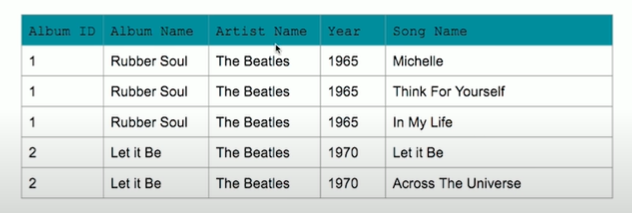

In [14]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS music_library2 (album_id int, \
                                                           album_name varchar, artist_name varchar, \
                                                           year int, song_name varchar);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
    cur.execute("INSERT INTO music_library2 (album_id, album_name, artist_name, year, song_name) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (1, "Rubber Soul", "The Beatles", 1965, "Michelle"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO music_library2 (album_id, album_name, artist_name, year, song_name) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (1, "Rubber Soul", "The Beatles", 1965, "Think For Yourself"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO music_library2 (album_id, album_name, artist_name, year, song_name) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (1, "Rubber Soul", "The Beatles", 1965, "In My Life"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO music_library2 (album_id, album_name, artist_name, year, song_name) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (2, "Let It Be", "The Beatles", 1970, "Let It Be"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO music_library2 (album_id, album_name, artist_name, year, song_name) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (2, "Let It Be", "The Beatles", 1970, "Across The Universe"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("SELECT * FROM music_library2;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(1, 'Rubber Soul', 'The Beatles', 1965, 'Michelle')
(1, 'Rubber Soul', 'The Beatles', 1965, 'Think For Yourself')
(1, 'Rubber Soul', 'The Beatles', 1965, 'In My Life')
(2, 'Let It Be', 'The Beatles', 1970, 'Let It Be')
(2, 'Let It Be', 'The Beatles', 1970, 'Across The Universe')


#### Moving to 2nd Normal Form (2NF)
We have moved our data to be in 1NF which is the first step in moving to 2nd Normal Form. Our table is not yet in 2nd Normal Form. While each of our records in our table is unique, our Primary key (*album id*) is not unique. We need to break this up into two tables, *album library* and *song library*. 

`Table Name: album_library 
column 0: Album Id
column 1: Album Name
column 2: Artist Name
column 3: Year `

`Table Name: song_library
column 0: Song Id
column 1: Song Name
column 3: Album Id` 

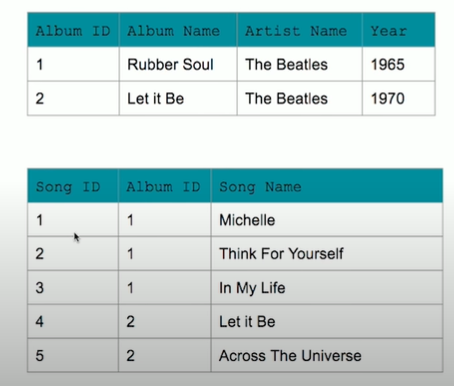

In [15]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS album_library (album_id int, \
                                                           album_name varchar, artist_name varchar, \
                                                           year int);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

try: 
    cur.execute("CREATE TABLE IF NOT EXISTS song_library (song_id int, album_id int, \
                                                          song_name varchar);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
    cur.execute("INSERT INTO album_library (album_id, album_name, artist_name, year) \
                 VALUES (%s, %s, %s, %s)", \
                 (1, "Rubber Soul", "The Beatles", 1965))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO album_library (album_id, album_name, artist_name, year) \
                 VALUES (%s, %s, %s, %s)", \
                 (2, "Let It Be", "The Beatles", 1970))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO song_library (song_id, album_id, song_name) \
                 VALUES (%s, %s, %s)", \
                 (1, 1, "Michelle"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO song_library (song_id, album_id, song_name) \
                 VALUES (%s, %s, %s)", \
                 (2, 1, "Think For Yourself"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO song_library (song_id, album_id, song_name) \
                 VALUES (%s, %s, %s)", \
                 (3, 1, "In My Life"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO song_library (song_id, album_id, song_name) \
                 VALUES (%s, %s, %s)", \
                 (4, 2, "Let It Be"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO song_library (song_id, album_id, song_name) \
                 VALUES (%s, %s, %s)", \
                 (5, 2, "Across the Universe"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

print("Table: album_library\n")
try: 
    cur.execute("SELECT * FROM album_library;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

print("\nTable: song_library\n")
try: 
    cur.execute("SELECT * FROM song_library;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)
row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

Table: album_library

(1, 'Rubber Soul', 'The Beatles', 1965)
(2, 'Let It Be', 'The Beatles', 1970)

Table: song_library

(1, 1, 'Michelle')
(2, 1, 'Think For Yourself')
(3, 1, 'In My Life')
(4, 2, 'Let It Be')
(5, 2, 'Across the Universe')


#### Let's do a `JOIN` on this table so we can get all the information we had in our first Table. 

In [16]:
try: 
    cur.execute("SELECT * FROM album_library JOIN\
                 song_library ON album_library.album_id = song_library.album_id ;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(1, 'Rubber Soul', 'The Beatles', 1965, 1, 1, 'Michelle')
(1, 'Rubber Soul', 'The Beatles', 1965, 2, 1, 'Think For Yourself')
(1, 'Rubber Soul', 'The Beatles', 1965, 3, 1, 'In My Life')
(2, 'Let It Be', 'The Beatles', 1970, 4, 2, 'Let It Be')
(2, 'Let It Be', 'The Beatles', 1970, 5, 2, 'Across the Universe')


#### Moving to 3rd Normal Form (3NF)
Check our table for any transitive dependencies. *Album_library* can move *Artist_name* to its own table, called *Artists*, which will leave us with 3 tables. 

`Table Name: album_library2 
column 0: Album Id
column 1: Album Name
column 2: Artist Id
column 3: Year `

`Table Name: song_library
column 0: Song Id
column 1: Song Name
column 3: Album Id`

`Table Name: artist_library
column 0: Artist Id
column 1: Artist Name `

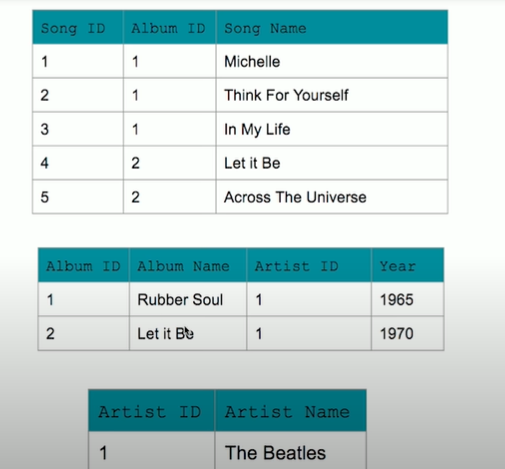


In [17]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS album_library2 (album_id int, \
                                                           album_name varchar, artist_id int, \
                                                           year int);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

try: 
    cur.execute("CREATE TABLE IF NOT EXISTS artist_library (artist_id int, \
                                                           artist_name varchar);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

    
try: 
    cur.execute("INSERT INTO album_library2 (album_id, album_name, artist_id, year) \
                 VALUES (%s, %s, %s, %s)", \
                 (1, "Rubber Soul", 1, 1965))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO album_library2 (album_id, album_name, artist_id, year) \
                 VALUES (%s, %s, %s, %s)", \
                 (2, "Let It Be", 1, 1970))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO artist_library (artist_id, artist_name) \
                 VALUES (%s, %s)", \
                 (1, "The Beatles"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    

print("Table: album_library2\n")
try: 
    cur.execute("SELECT * FROM album_library2;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

print("\nTable: song_library\n")
try: 
    cur.execute("SELECT * FROM song_library;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

##Doublechecking that data is in the table
print("\nTable: artist_library\n")
try: 
    cur.execute("SELECT * FROM artist_library;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

Table: album_library2

(1, 'Rubber Soul', 1, 1965)
(2, 'Let It Be', 1, 1970)

Table: song_library

(1, 1, 'Michelle')
(2, 1, 'Think For Yourself')
(3, 1, 'In My Life')
(4, 2, 'Let It Be')
(5, 2, 'Across the Universe')

Table: artist_library

(1, 'The Beatles')


#### Let's do two `JOIN` on these 3 tables so we can get all the information we had in our first Table. 

In [18]:
try: 
    cur.execute("SELECT * \
                 FROM artist_library \
                    JOIN album_library2 ON artist_library.artist_id = album_library2.artist_id \
                    JOIN song_library ON album_library2.album_id=song_library.album_id;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(1, 'The Beatles', 1, 'Rubber Soul', 1, 1965, 1, 1, 'Michelle')
(1, 'The Beatles', 1, 'Rubber Soul', 1, 1965, 2, 1, 'Think For Yourself')
(1, 'The Beatles', 1, 'Rubber Soul', 1, 1965, 3, 1, 'In My Life')
(1, 'The Beatles', 2, 'Let It Be', 1, 1970, 4, 2, 'Let It Be')
(1, 'The Beatles', 2, 'Let It Be', 1, 1970, 5, 2, 'Across the Universe')


### DONE! We have Normalized our dataset! 

### For the sake of the demo, I will drop the tables. 

In [8]:
try: 
    cur.execute("DROP table music_library")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table music_library2")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table album_library")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table song_library")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table album_library2")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table artist_library")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table song_library1")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

Error: Dropping table
table "album_library2" does not exist

Error: Dropping table
table "artist_library" does not exist



### And finally close your cursor and connection. 

In [9]:
cur.close()
conn.close()